In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

In [4]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
# 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [5]:
df1 = pd.read_csv('EDA/병합/train_2_신용정보_병합.csv')

In [6]:
with pd.option_context('display.max_rows', None):
    display(resumetable(df1, 5))

데이터셋 크기: (2400000, 42)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값,4번째 값,5번째 값
0,기준년월,int64,0,6,201807,201807,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002,TRAIN_000003,TRAIN_000004
2,최초한도금액,int64,0,8802,0,0,0,0,0
3,카드이용한도금액,int64,0,81852,19354,9996,88193,19062,177222
4,CA한도금액,int64,0,63634,7270,5718,35207,6531,47149
5,일시상환론한도금액,int64,0,7307,0,41996,0,0,48000
6,월상환론한도금액,int64,0,65045,0,90611,0,0,155020
7,CA이자율_할인전,float64,0,1882014,22.995207,14.793821,22.014276,22.998014,14.661948
8,CL이자율_할인전,float64,0,2126771,18.254978,14.834873,17.875321,22.999453,10.89741
9,RV일시불이자율_할인전,float64,0,1897473,17.264967,10.622446,17.155829,19.293674,10.654587


## 고윳값 1개 or 불균형 컬럼 파악

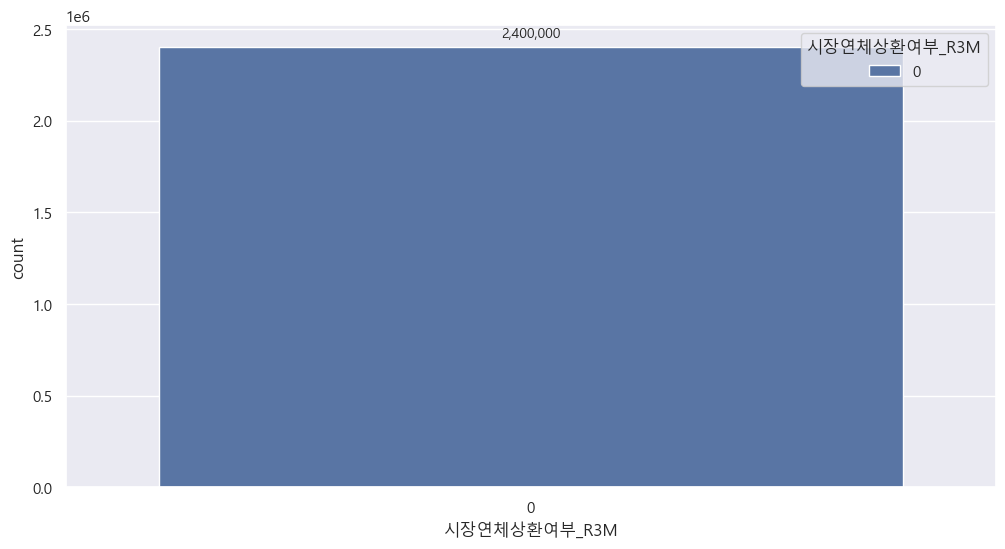

In [8]:
col = '시장연체상환여부_R3M				'.strip()
order = sorted(df1[col].unique())

ax = sns.countplot(data=df1, x=col, hue=col, order=order)
annotate_countplot(ax)
plt.show()

In [61]:
zero_count = (df1['한도심사요청후경과월'] == 3).sum()
total = len(df1)
print(f"개수(비율): {zero_count} ({zero_count / total:.2%})")


개수(비율): 2399928 (100.00%)


In [60]:
df1[df1['한도심사요청후경과월'] == 2]

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
9029,201807,TRAIN_009029,0,47117,13481,0,0,14.851652,14.835025,10.689315,...,0,1회이상,0,2,3,0,0,0,0,99999999
23739,201807,TRAIN_023739,0,53698,19992,0,154045,14.756629,14.852457,11.089089,...,0,1회이상,0,2,3,0,0,0,0,99999999
35372,201807,TRAIN_035372,10000,19936,11214,0,0,14.794411,14.841148,10.916510,...,0,1회이상,0,2,3,0,0,0,0,99999999
42325,201807,TRAIN_042325,0,48253,16095,0,19935,14.654970,14.821561,10.332679,...,0,1회이상,0,2,3,0,0,0,0,99999999
70730,201807,TRAIN_070730,0,46280,16031,0,21052,14.854815,14.818194,13.267965,...,0,1회이상,1,2,1,0,0,0,0,835
124156,201807,TRAIN_124156,0,48884,12779,0,0,14.221600,17.727778,13.839543,...,0,1회이상,0,2,3,0,0,0,0,99999999
125283,201807,TRAIN_125283,0,9998,3656,0,20372,14.875566,14.827836,10.298288,...,0,1회이상,1,2,2,0,0,0,0,99999999
137892,201807,TRAIN_137892,0,168154,31739,0,20793,14.219972,14.850949,10.670867,...,0,1회이상,0,2,3,0,0,0,0,99999999
221858,201807,TRAIN_221858,0,44134,9790,0,0,16.963410,17.896047,12.732837,...,0,1회이상,1,2,2,0,0,0,0,197
371550,201807,TRAIN_371550,0,9993,4824,0,0,17.015019,15.618264,13.283865,...,0,1회이상,0,2,3,0,0,0,0,99999999


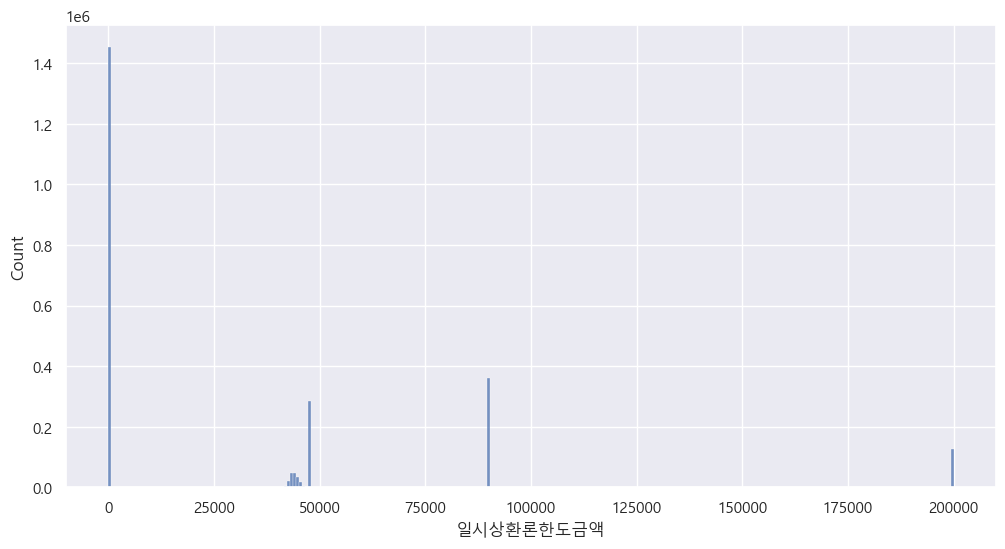

In [16]:
sns.histplot(data=df1, x='일시상환론한도금액')
plt.show()

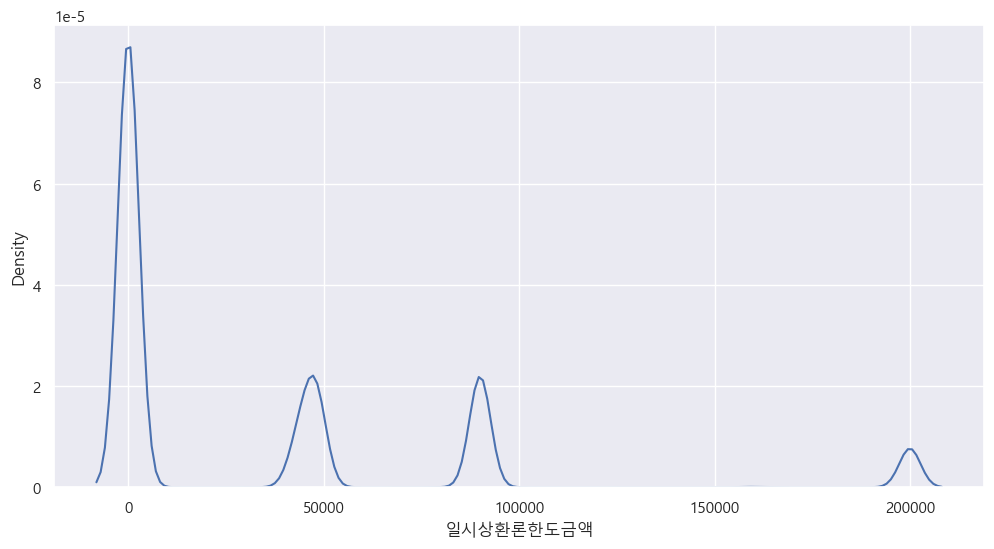

In [17]:
sns.kdeplot(data=df1, x='일시상환론한도금액')
plt.show()

In [66]:
df1.drop(columns=['시장연체상환여부_R6M', '시장연체상환여부_R3M'], inplace=True)
resumetable(df1,3)

데이터셋 크기: (2400000, 40)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,기준년월,int64,0,6,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002
2,최초한도금액,int64,0,8802,0,0,0
3,카드이용한도금액,int64,0,81852,19354,9996,88193
4,CA한도금액,int64,0,63634,7270,5718,35207
5,일시상환론한도금액,int64,0,7307,0,41996,0
6,월상환론한도금액,int64,0,65045,0,90611,0
7,CA이자율_할인전,float64,0,1882014,22.995207,14.793821,22.014276
8,CL이자율_할인전,float64,0,2126771,18.254978,14.834873,17.875321
9,RV일시불이자율_할인전,float64,0,1897473,17.264967,10.622446,17.155829


In [71]:
df1.to_csv('결측치 처리/병합/train_2_신용정보_unique1제거_40.csv', index=False, encoding='utf-8-sig')

# 한쪽 클래스 값이 98% 이상인 컬럼 제거
- 한쪽이 불균형하게 쏠린 컬럼 찾기

In [14]:
df2 = pd.read_csv('EDA/unique제거/train_2_신용정보_unique1제거_40.csv')

In [18]:
resumetable(df2,3)

데이터셋 크기: (2400000, 30)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,기준년월,int64,0,6,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002
2,최초한도금액,int64,0,8802,0,0,0
3,카드이용한도금액,int64,0,81852,19354,9996,88193
4,CA한도금액,int64,0,63634,7270,5718,35207
5,일시상환론한도금액,int64,0,7307,0,41996,0
6,월상환론한도금액,int64,0,65045,0,90611,0
7,CA이자율_할인전,float64,0,1882014,22.995207,14.793821,22.014276
8,CL이자율_할인전,float64,0,2126771,18.254978,14.834873,17.875321
9,RV일시불이자율_할인전,float64,0,1897473,17.264967,10.622446,17.155829


In [17]:
# 98% 이상인 컬럼 제거
cols_to_drop2 = [
    '자발한도감액횟수_R12M',
    '자발한도감액금액_R12M',
    '자발한도감액후경과월',
    '특별한도보유여부_R3M',
    '연체감액여부_R3M',
    '한도심사요청건수',
    '한도요청거절건수',
    '한도심사요청후경과월',
    '시장단기연체여부_R6M',
    '시장단기연체여부_R3M',
]

df2 = df2.drop(columns=cols_to_drop2)

In [19]:
df2.to_csv('EDA/98이상제거/train_2_신용정보_98이상제거_30.csv', index=False, encoding='utf-8-sig')